<a href="https://colab.research.google.com/github/SARA3SAEED/ML-Mu/blob/main/s05b_supervised_classification_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning | Classification (K-NN)

Today's Outline:
- Intuition
- Full Case-study

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


==========

## K-Nearest Neighbors (K-NN) | Intuition (T-Shirt Sizing)

Scikit-Learn Neighbors Module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

Machine Learning Playground: https://ml-playground.com/

K-NN Demos:
- http://vision.stanford.edu/teaching/cs231n-demos/knn/
- https://lecture-demo.ira.uka.de/knn-demo/#

***You own an online clothing business and you would like to develop a new app (or in-store) feature in which customers would enter their own height and weight and the system would predict what T-shirt size should they wear. Features are height and weight and output is either L (Large) or S (Small).***

Data Source:
https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html

In [4]:
# from IPython.display import Image
# Image("imgs/knn-chart.PNG")

### Importing Dataset

In [5]:
tshirt = pd.read_csv("/content/drive/MyDrive/ML-Mu/supervised-classification/datasets/knn-tshirt-sizing.csv")
tshirt.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


### Splitting & Preprocessing Data

In [6]:
X = tshirt.iloc[:, 0:2].values
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]])

In [7]:
y = tshirt.iloc[:, 2].values
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Model Training & Predicting

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1])

### Model Evaluation

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

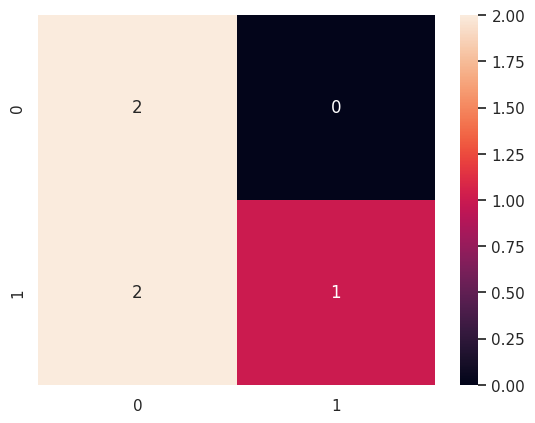

In [13]:
sns.heatmap(cm, annot=True, fmt="d")

==========

## K-NN | Full Case-study (Social Media Advertising)

### Importing Dataset & Extracting Features

In [14]:
ads = pd.read_csv('/content/drive/MyDrive/ML-Mu/supervised-classification/datasets/social-network-ads.csv')
ads

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [15]:
X = ads.iloc[:, :-1].values
y = ads.iloc[:, -1].values

In [16]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [ ]:
y

### Data Splitting & Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Training & Predicting

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [21]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


### Model Evaluation

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

### Choosing Best Value of 'K'

In [23]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)

    y_pred_test = knn_model.predict(X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [24]:
test_error_rates

[0.13,
 0.09999999999999998,
 0.06999999999999995,
 0.07999999999999996,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995,
 0.06999999999999995]

Text(0.5, 0, 'K Value')

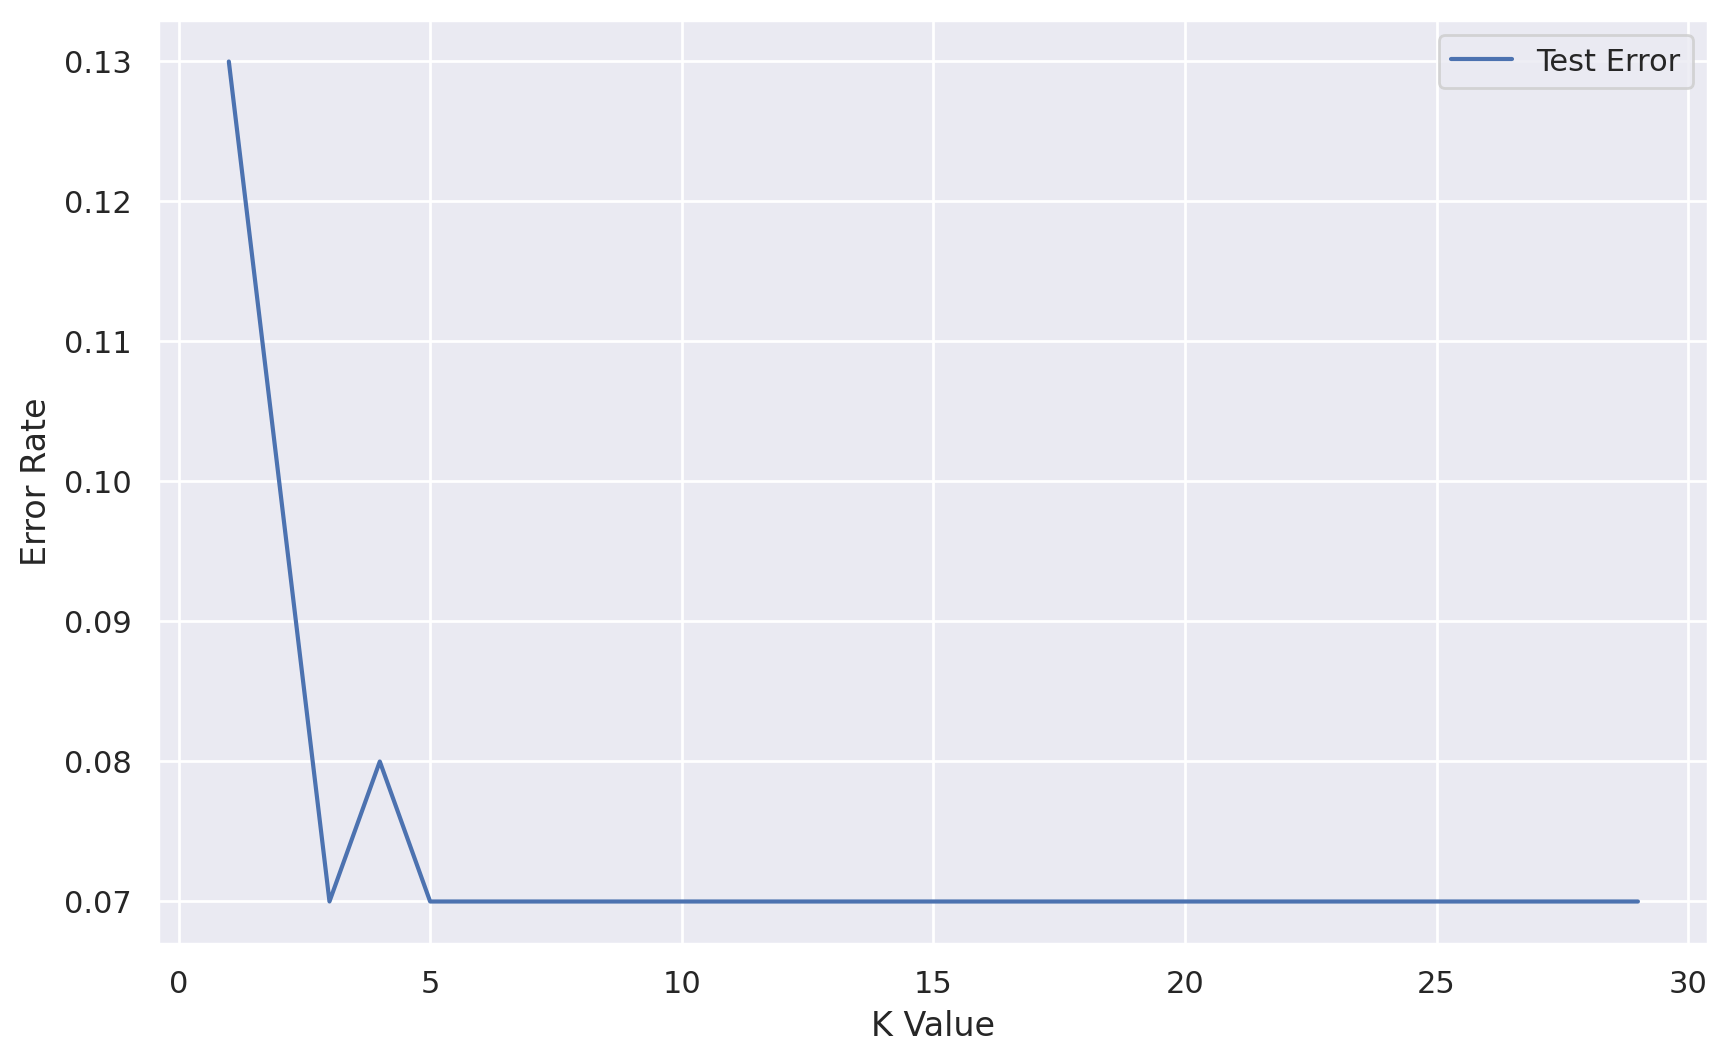

In [25]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

==========

# THANK YOU!